# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rahmat Ramadhan
- **Email:** rahmatrmdn15@gmail.com
- **ID Dicoding:** ramadhan15

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan bulanan selama periode 2016 hingga 2018?
- Produk kategori apa yang menghasilkan pendapatan tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [7]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
product_df = pd.read_csv('products_dataset.csv')
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai tabel customers_df



In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum() )

Jumlah duplikasi:  0


In [18]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel geolocation_df

In [19]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698744 entries, 0 to 698743
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  698744 non-null  int64  
 1   geolocation_lat              698744 non-null  float64
 2   geolocation_lng              698744 non-null  float64
 3   geolocation_city             698744 non-null  object 
 4   geolocation_state            698743 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 26.7+ MB


In [20]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,1


In [21]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  196950


In [22]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,698744.000000,698744.000000,698744.000000
mean,18377.828239,-21.993107,-45.429131
std,12501.190817,2.434807,2.511358
min,1001.000000,-34.622400,-101.466766
25%,6807.000000,-23.543316,-46.755217
50%,15091.000000,-22.909776,-46.501130
75%,28960.000000,-21.173843,-43.449630
max,47590.000000,43.684961,13.820214


Menilai tabel order_items_df

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel order_payments_df

In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai tabel order_reviews_df

In [29]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [31]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel orders_df

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [35]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel product_category_df

In [37]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai tabel product_df

In [40]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [42]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel sellers_df

In [44]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Membersihkan tabel geolocation_df

Data duplicate

In [47]:
geolocation_df.drop_duplicates(inplace=True)

In [48]:
geolocation_df.duplicated().sum()

0

Missing value

In [49]:
geolocation_df.dropna(axis=0, inplace=True)
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Membersihkan tabel order_reviews_df

In [50]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [51]:
order_reviews_df[order_reviews_df.review_comment_title.isna()|order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [52]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [53]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [54]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Recomendo')

In [55]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Muito bom')

Membersihkan tabel orders_df

Missing value

In [56]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [57]:
orders_df.dropna(axis=0, inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Membersihkan tabel prodcut_df

Missing value

In [58]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [59]:
product_df.dropna(axis=0, inplace=True)
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


## Exploratory Data Analysis (EDA)

Explore customer_df

In [60]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58356,e338256559cac84fbc89404394ac43bc,3e301f8fdb84fe9050faee7df6eb9849,21842,rio de janeiro,RJ
50867,6b6eea107c6bf3987e5d11da2f503e0a,c3e2e101197c3acccdd1d2a7618c6a73,28994,saquarema,RJ
30759,cd47d198f0840df01cf63596c6f4c429,a4b1243a3712eefc2d8ae5d053a1d298,85802,cascavel,PR
24273,91f2fe378f8c723cbdcc798e3164c9d4,0977cd50786b1f5d899cc3b93989acea,54360,jaboatao dos guararapes,PE
4451,327950402467e8f955ccce468c81a566,81e260288b8f6969e6ee5d5dfa7284bd,88490,paulo lopes,SC


In [61]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
customers_df.customer_id.is_unique

True

In [63]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [64]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Explore order_items_df

In [65]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
16294,254b6101a615cb031624d5631cabf648,1,7285e977b36a2243203636b240772c5e,91f848e9f4be368f4318775aac733370,2017-05-26 06:35:12,34.99,14.10
78176,b1e6c30e469d786d5c2ba74511772cc2,1,81d879a43537a2803762ce12282ccbc9,9674754b5a0cb32b638cec001178f799,2017-12-04 12:07:39,57.39,15.16
45346,670c4b17da301d33c203760668ded9b1,1,7c6456ce44e4a343711f66c893e3e8fd,52f9db5cfb423382a2fa5c9e39303202,2018-08-08 04:11:05,49.99,23.15
82870,bc314ea94634ec397df2b65d3bcb2c1c,1,7703b8cb5b77fbb36518ea91e2ca734f,6560211a19b47992c3666cc44a7e94c0,2017-10-24 16:29:31,39.00,15.10
84049,beeee30f17612200615fd1ce39b41a43,1,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,2017-08-24 22:44:42,89.99,7.88


In [66]:
order_items_df.order_id.is_unique

False

In [67]:
order_items_df.order_id.duplicated()

,order_id
0,False
1,False
2,False
3,False
4,False
...,...
112645,False
112646,False
112647,False
112648,False


In [68]:
order_items_df.groupby(by="order_item_id").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_item_id,order_id
0,1,98666
1,2,9803
2,3,2287
3,4,965
4,5,460
5,6,256
6,7,58
7,8,36
8,9,28
9,10,25


Explore orders_df

In [69]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
43311,10fbf4deeecbf5381ea7de8d87603c0f,34af4d04a7a8bf9f3165365b13b10878,delivered,2018-04-02 17:37:17,2018-04-02 17:50:15,2018-04-14 00:06:46,2018-04-20 23:04:18,2018-05-07 00:00:00
71484,70de580c254e6fc014c22e93c8c0708d,42a1099724d7b2c28cceef7328b874da,delivered,2017-11-12 22:07:37,2017-11-12 22:26:34,2017-11-21 22:32:34,2017-11-22 22:09:17,2017-11-27 00:00:00
79586,d6229aca790acb92366c9888f1e0c181,5cb5ff757d630a29902ea9b9699b936e,delivered,2017-02-12 19:40:41,2017-02-12 19:50:19,2017-02-14 12:28:30,2017-02-17 06:52:16,2017-03-10 00:00:00
49913,e11871c4a3ca0a9435621f216fcecaeb,e013e14a148fb8b6f18a1838c893b51e,delivered,2017-06-06 04:05:46,2017-06-07 02:42:30,2017-06-09 09:04:14,2017-06-12 14:09:47,2017-06-20 00:00:00
12281,e0e7a5ed15876cb23ebbdbf2879c76d1,0852c9fc981f16e491aaa5a66a0b4de3,delivered,2017-11-14 16:23:41,2017-11-14 17:04:15,2017-11-16 16:21:23,2017-11-25 16:19:00,2017-12-05 00:00:00


In [70]:
orders_df.order_id.is_unique

True

Explore orders_df & order_items_df

In [71]:
orders_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [72]:
orders_items_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96455
canceled,6


In [73]:
orders_items_df['order_purchase_timestamp'] = pd.to_datetime(orders_items_df['order_purchase_timestamp'])

In [74]:
orders_items_df['year_month'] = orders_items_df['order_purchase_timestamp'].dt.to_period('M')

Explore product_df

In [75]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
29379,77da35d9e8023abd25ed7a92d9a65288,beleza_saude,53.0,3071.0,2.0,450.0,29.0,14.0,15.0
21245,66d59b954a33c0c14fc6b88548833370,cama_mesa_banho,49.0,729.0,1.0,3300.0,20.0,30.0,30.0
19647,4048d207d5f97fb47be6486952d641aa,eletronicos,60.0,2429.0,1.0,10800.0,100.0,20.0,70.0
31801,9799c69682bf50ba578e6b9c9886b607,utilidades_domesticas,52.0,1476.0,2.0,13050.0,61.0,21.0,61.0
13660,1ca64333e21cc2921b28c702e3ad522b,artigos_de_festas,15.0,342.0,1.0,300.0,16.0,11.0,11.0


In [76]:
product_df.product_id.is_unique

True

In [77]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Explore sellers_df

In [78]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2054,594f9aaa48e5bf431f011ddc5669b0d5,32185,contagem,MG
2430,134a288e7de827ec5ec62e3ec9c3a295,3168,sao paulo,SP
181,1e9d5a33694bddb76316fd1f54734d20,78820,jaciara,MT
1023,ed859002ad59dbf8cf3602696a6c3000,86035,londrina,PR
3056,a478c7961d6a992065b24e63b366f90b,89036,blumenau,SC


In [79]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [80]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Explore orders_items_df & product_df

In [81]:
order_items_product_df = pd.merge(
    left=orders_items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,year_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,2017-10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,2018-07,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.22,2018-08,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,2017-11,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,2018-02,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


## Visualization & Explanatory Analysis

### Bagaimana tren penjualan bulanan selama periode 2016 hingga 2018?

In [82]:
orders_items_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month
75332,908c02868bb2a9b847e64b23139137e5,76f71522a4d0db001ac6caf99763656f,delivered,2018-06-17 09:42:02,2018-06-18 21:35:43,2018-06-19 14:35:00,2018-06-26 17:08:21,2018-07-13 00:00:00,1,c10a7001e8b49dfc03817444b5f2ed81,056b4ada5bbc2c50cc7842547dda6b51,2018-06-20 21:31:44,129.99,19.01,2018-06
60002,5bb7a11eb58ffba1a56c37d59dc1f1ec,21db802cd8191c5514054c036edd3ea2,delivered,2017-05-28 17:08:43,2017-05-30 04:50:23,2017-05-30 14:08:26,2017-06-08 14:47:39,2017-06-23 00:00:00,1,8a2c3b7ed6d098de813279ade9a1d0de,3b15288545f8928d3e65a8f949a28291,2017-06-07 04:50:23,169.99,21.68,2017-05
41483,cb06895eef8c353edd5828ac4281eb9b,fb52c7e87623a460b760cae7969da353,delivered,2017-05-31 17:23:07,2017-05-31 17:35:09,2017-06-01 14:26:33,2017-06-06 14:13:07,2017-06-28 00:00:00,1,130482add9fd75ccb6c57ba007694a2d,87142160b41353c4e5fca2360caf6f92,2017-06-07 17:35:09,105.00,22.60,2017-05
69631,ff12a8872c437666ba0b1df5812a956e,60c2cececa9f77296d64e5a4def548e6,delivered,2017-08-02 14:19:54,2017-08-02 14:30:20,2017-08-04 17:35:43,2017-08-11 19:34:06,2017-08-24 00:00:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 14:30:20,44.99,14.10,2017-08
71758,0feaee28abc2453bef40e3718f5c7392,5e957c82296e9ef12df4cb22d052db4a,delivered,2018-03-11 23:51:44,2018-03-13 00:28:19,2018-03-16 18:46:36,2018-05-25 16:03:24,2018-04-03 00:00:00,1,53b0b6e69e80935440712605cd5699c2,e9779976487b77c6d4ac45f75ec7afe9,2018-03-19 00:28:19,65.00,18.33,2018-03


In [83]:
monthly_orders_df = orders_items_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47


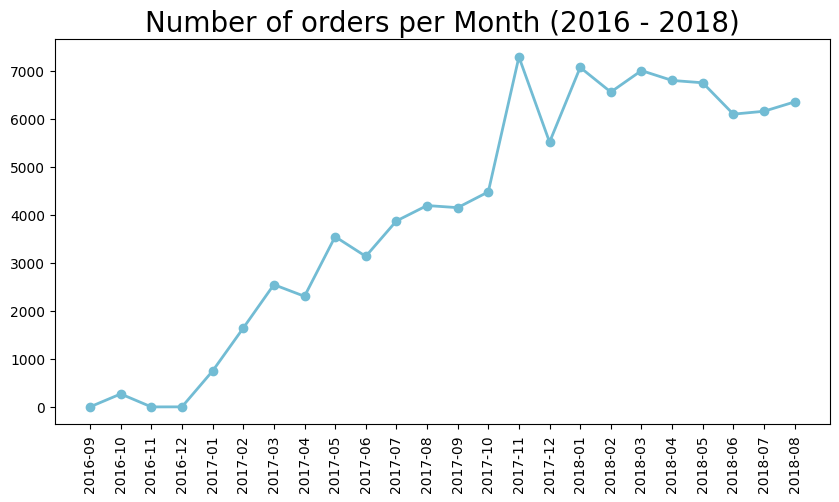

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of orders per Month (2016 - 2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

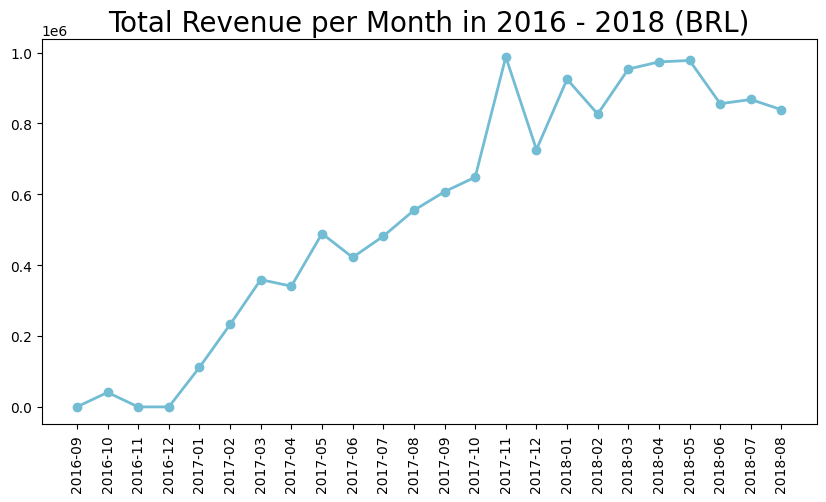

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2016 - 2018 (BRL)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

### Produk kategori apa yang menghasilkan pendapatan tertinggi dan terendah?

In [86]:
order_items_product_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,year_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
30567,cf9b4bc8a0831980b324e030bf8cf1f3,91f82b10ee276b5877b6bed27525b58d,delivered,2018-07-13 21:06:25,2018-07-13 21:24:08,2018-07-17 15:18:00,2018-07-24 00:31:20,2018-08-08 00:00:00,1,2b4609f8948be18874494203496bc318,...,37.47,2018-07,beleza_saude,59.0,492.0,3.0,250.0,22.0,10.0,18.0
74119,c69a4e800792132c8c39b559c8cda572,f0b68e35ddd2c5191d55d6191faa4397,delivered,2017-04-12 12:34:03,2017-04-13 02:42:44,2017-04-13 14:25:09,2017-04-18 16:24:19,2017-05-04 00:00:00,1,6d2c812450dd02b2f87495af63f9b709,...,8.72,2017-04,telefonia,45.0,400.0,3.0,100.0,19.0,3.0,11.0
44136,48b8106306f7a0a72b4e74eed5635ffc,f2efdcd71b76cfbb70c85f07a1c26144,delivered,2017-04-20 21:07:01,2017-04-20 21:21:49,2017-04-27 09:56:34,2017-05-10 12:50:11,2017-05-17 00:00:00,1,0795fbcdc1ae9c0d7106b8018ad341a8,...,10.96,2017-04,utilidades_domesticas,38.0,466.0,1.0,300.0,16.0,17.0,12.0
61889,88138c1ad58f2e3eb654cfc1ba222742,edfacba557aa99092bb3d28b74fec87a,delivered,2017-03-23 20:15:11,2017-03-24 18:35:23,2017-03-27 13:34:50,2017-03-31 19:10:06,2017-04-18 00:00:00,1,8318a2808212aaad26bcb506a505d45d,...,18.18,2017-03,beleza_saude,53.0,722.0,1.0,700.0,16.0,18.0,16.0
53336,895dce73de79888b14581541cf3a811b,ae546948bceb228b6f6a1980f9c28aca,delivered,2017-10-27 13:26:59,2017-10-27 13:48:09,2017-10-30 21:07:01,2017-11-06 17:51:29,2017-11-17 00:00:00,5,0e839be47c2dc028ca3d90e65732b14c,...,2.31,2017-10,moveis_decoracao,52.0,2057.0,2.0,700.0,60.0,7.0,14.0


In [87]:
sum_income_df = order_items_product_df.groupby("product_category_name").price.sum().sort_values(ascending=False).reset_index()
sum_income_df.head()

,product_category_name,price
0,beleza_saude,1233211.61
1,relogios_presentes,1165898.98
2,cama_mesa_banho,1023300.77
3,esporte_lazer,954626.07
4,informatica_acessorios,888613.62


<ipython-input-88-1caa4d127f9c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_income_df.head(5), palette=colors, ax=ax[0])
<ipython-input-88-1caa4d127f9c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name", data=sum_income_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])


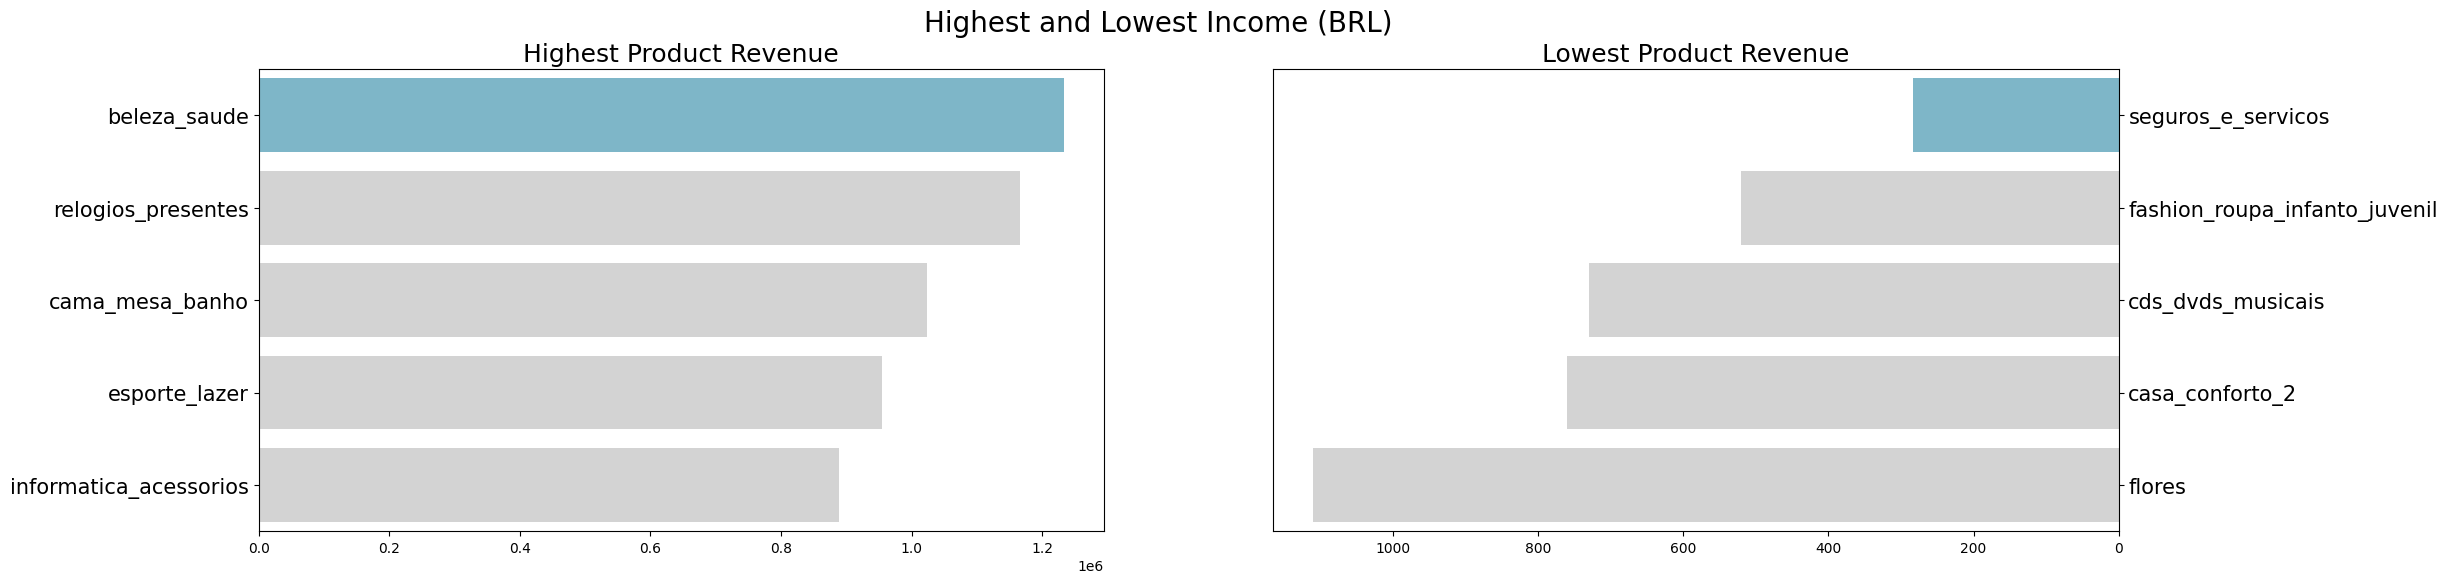

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define colors for the plots
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot for highest product revenue
sns.barplot(x="price", y="product_category_name", data=sum_income_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Highest Product Revenue", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot for lowest product revenue
sns.barplot(x="price", y="product_category_name", data=sum_income_df.sort_values(by="price", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest Product Revenue", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Overall title for the figure
plt.suptitle("Highest and Lowest Income (BRL)", fontsize=20)

# Show the plots
plt.show()

## Conclusion

- Conclution pertanyaan 1.
*   Diagram Number of orders per Month (2016 - 2018).
Terjadi peningkatan yang cukup
signifikan dalam jumlah pesanan dari tahun 2016 hingga 2018. Ini menunjukkan adanya pertumbuhan bisnis yang positif selama periode tersebut. Puncaknya terjadi pada bulan 11 2017.
*   Diagram Total Revenue per Month in 2016 - 2018 (BRL).
Terjadi tren peningkatan pendapatan dari tahun 2016 hingga tahun 2018 yang mengindikasikan pertumbuhan bisnis yang positif selama periode tersebut. Pendapatan tertinggi terjadi pada bulan 11 tahun 2017.

- Conclution pertanyaan 2
*   Highest Product Revenue. Kategori "beleza saúde" memberikan pendapatan tertinggi. Ini berarti produk-produk dalam kategori ini memiliki peminat yang sangat tinggi, baik dalam hal frekuensi pembelian maupun nilai transaksi.
*   Lowest Product Revenue. Kategori "seguros_e_servicos" memiliki pendapatan terendah. Hal ini disebabkan oleh beberapa faktor, seperti persaingan yang ketat, kurangnya minta konsumen, dan faktor-faktor lainnya.



In [89]:
orders_items_df.to_csv("orders_items.csv", index=False)

In [90]:
sum_income_df.to_csv("order_items_product.csv", index=False)